# Les modélisations

Code sous licence creative commun CC BY-NC-SA BY Gaëlle Rebolini

Dans ce tutoriel, on apprendra à modéliser un nuage de points modélisable par une fonction polynomiale.

Pour cela, on utilisera la fonction **np.polyfit( x , y , deg)** de la bibliothèque numpy as np.

Le paramètre deg correspond au degré du polynôme.

La fonction polyfit retourne un tableau numpy à une dimension de coefficients p qui minimisent l'erreur à l'aide de la méthode des moindres carrés dans l'ordre : deg , deg-1 ,… 0 

$P(x) = p[0] \times x^{deg} + p[1] \times x^{deg-1}... + p[deg]$

D'autres paramètres existent. Pour plus d'informations :

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html

Dans le cadre du programme de physique-chimie au lycée, on a besoin au plus de polynômes du second degré.

- Pour un polynôme de degré 2 : $P(x)=p[0]\times x^2+p[1]\times x+p[2]$
- Pour un polynôme de degré 1 : $P(x)=p[0]\times x+p[1]$
- Pour un polynôme de degré 0 : $P(x)=p[0]$

Reprenons l'exemple de la loi d'Ohm (Tutoriel sur le tracé d'un graphique $1^{ère}$ partie) et modélisons la courbe obtenue.

Pour commencer, affichons la courbe obtenue avant modélisation :

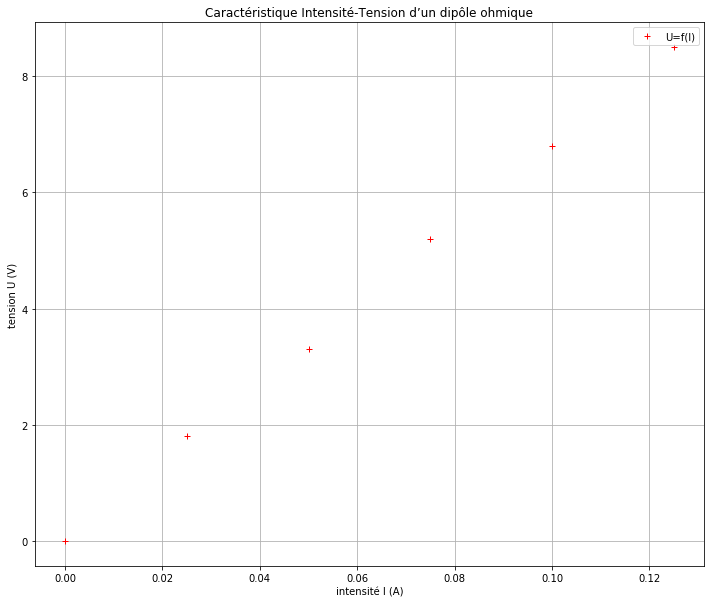

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# tableaux numpy impératifs pour réaliser le calcul (vectorisé) de 
# la tension modélisée Umodel lors de la modélisation ultérieure

I=np.array([0,25e-3,50e-3,75e-3,100e-3,125e-3])      
U=np.array([0,1.8,3.3,5.2,6.8,8.5]) 

fig = plt.figure(figsize=(12,10))
plt.plot(I,U,'r+',label='U=f(I)')
plt.legend()
plt.xlabel("intensité I (A)")
plt.ylabel("tension U (V)")
plt.grid()
plt.title("Caractéristique Intensité-Tension d’un dipôle ohmique")
plt.show()

Modélisons maintenant la courbe obtenue par une droite (polynôme d'ordre 1) et affichons les coefficients :

In [8]:
coeff=np.polyfit(I, U,1)
print(coeff[0],coeff[1])

67.88571428571427 0.023809523809523614


Avec une décimale :

In [9]:
print ('{0:.1f}'.format(coeff[0]),'{0:.1f}'.format(coeff[1]))

67.9 0.0


Créons l'équation de la droite modélisée grâce à ces coefficients et affichons cette équation ainsi que son tableau de valeurs :

In [10]:
Umodel = coeff[0]*I+coeff[1]          
print('U={0:.1f}'.format(coeff[0]),'+{0:.1f}'.format(coeff[1]))
print(Umodel)

U=67.9 +0.0
[0.02380952 1.72095238 3.41809524 5.1152381  6.81238095 8.50952381]


Affichons maintenant les points expérimentaux et la droite modélisée sur le même graphique :

**NOTE CODAGE : 'r+' à la ligne 2 permet d'afficher un + rouge pour chaque point expérimental alors que 'b-' à la ligne 3 permet de relier les points modélisés par des segments de droite bleus.**

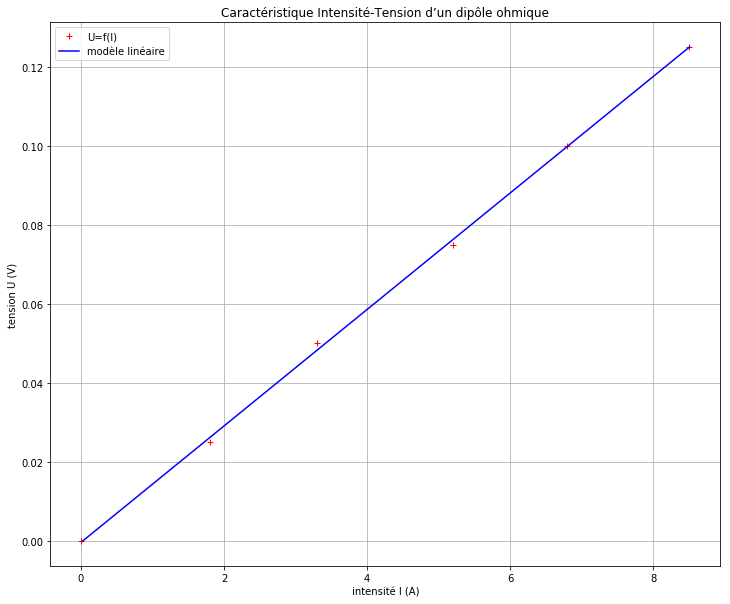

In [11]:
fig = plt.figure(figsize=(12,10))
plt.plot(U,I,'r+',label='U=f(I)')
plt.plot(Umodel,I,'b-',label='modèle linéaire')
plt.legend()
plt.xlabel("intensité I (A)")
plt.ylabel("tension U (V)")
plt.grid()
plt.title("Caractéristique Intensité-Tension d’un dipôle ohmique")
plt.show()

**Voici le programme dans sa totalité afin d'y voir un peu plus clair !**

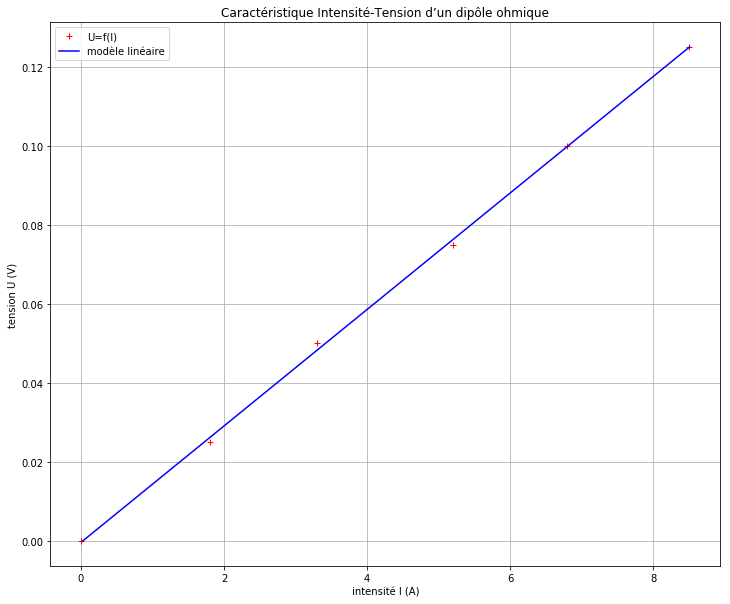

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I=np.array([0,25e-3,50e-3,75e-3,100e-3,125e-3]) 
U=np.array([0,1.8,3.3,5.2,6.8,8.5])

coeff=np.polyfit(I, U,1)
Umodel = coeff[0]*I+coeff[1]

fig = plt.figure(figsize=(12,10))
plt.plot(U,I,'r+',label='U=f(I)')
plt.plot(Umodel,I,'b-',label='modèle linéaire')
plt.legend()
plt.xlabel("intensité I (A)")
plt.ylabel("tension U (V)")
plt.grid()
plt.title("Caractéristique Intensité-Tension d’un dipôle ohmique")
plt.show()

Remarque : afin de réaliser une régression linéaire, il est aussi possible d'utiliser la fonction issue de la bibliothèque scipy : **scipy.stats.linregress**.

Cette fonction est un plus ardue d'utilisation pour des débutants mais permet d'obtenir la valeur du coefficient de corrélation.

Pour plus d'informations : 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html